In [11]:
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns

In [12]:
!pip install sdv
import sdv

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic

from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot
!pip install table_evaluator
from table_evaluator import load_data, TableEvaluator


In [13]:
df=pd.read_csv("pokemon_train_set (1).csv")

In [14]:
df.drop('Name',axis=1,inplace=True)

In [15]:
df.head(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Grass,Poison,45,49,49,65,65,45,1,False,Basic


In [16]:
metadata = SingleTableMetadata()

Meta-Daten werden auf dem DataFrame herausgelesen

In [17]:
metadata.detect_from_dataframe(df)

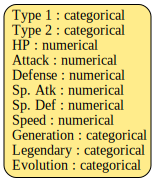

In [18]:
metadata.visualize()

CT-GAN wird mit den Hyperparameter trainiert
* epochs=1800
* batch_size=80
* discriminator_steps=3
* discriminator_lr=0.001
* generator_lr=0.002

In [19]:
synthesizer = CTGANSynthesizer(metadata,epochs=1800,batch_size=80,discriminator_steps=3,discriminator_lr=0.001,generator_lr=0.002,verbose=True)
synthesizer.fit(df)
#---> 91 %


/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (0.28) | Discrim. (0.51): 100%|██████████| 1800/1800 [17:43<00:00,  1.69it/s]


In [20]:
# synthesizer._model.loss_values

In [21]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [22]:
df.sample(2)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
707,Dragon,Electric,100,150,120,120,100,90,5,True,Basic
530,Ice,Ghost,70,80,70,80,70,110,4,False,Stage1


In [23]:
synthetic_data = synthesizer.sample(num_rows=len(df))
synthetic_data.sample(2)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
358,Water,Rock,255,126,138,194,119,79,2,False,Basic
20,Normal,Fairy,28,16,81,50,84,35,6,False,Stage1


In [24]:
fig = synthesizer.get_loss_values_plot()
fig.show()

In [25]:
diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 406.75it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 124.70it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [26]:
quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 447.14it/s]|
Column Shapes Score: 90.53%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 59.80it/s]|
Column Pair Trends Score: 83.71%

Overall Score (Average): 87.12%



In [27]:
fig=quality_report.get_visualization('Column Shapes')
fig.show()

In [28]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Generation',
    metadata=metadata
)

fig.show()

In [29]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Attack","Defense"],
    metadata=metadata
)
fig2.show()

In [30]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=['Sp. Atk','Sp. Def'],
    metadata=metadata
)
fig2.show()

In [31]:
df['Total']=df[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].sum(axis=1)

In [32]:
synthetic_data['Total']=synthetic_data[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].sum(axis=1)

In [34]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

In [37]:
df.sample(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
775,Dragon,NaN,68,75,53,83,113,60,6,False,Stage1,452


In [36]:
synthetic_data.sample(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,Total
694,Rock,NaN,57,105,89,55,75,51,4,False,Stage2,432


In [38]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Generation","Total"],
    metadata=metadata
)
fig2.show()

In [39]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Type 1","Total"],
    metadata=metadata
)
fig2.show()

In [40]:
fig2 = get_column_pair_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_names=["Type 2", "Total"],
    metadata=metadata
)
fig2.show()


In [41]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Attack',
    metadata=metadata
)

fig.show()

In [42]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Defense',
    metadata=metadata
)

fig.show()

In [43]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='Evolution',
    metadata=metadata
)

fig.show()

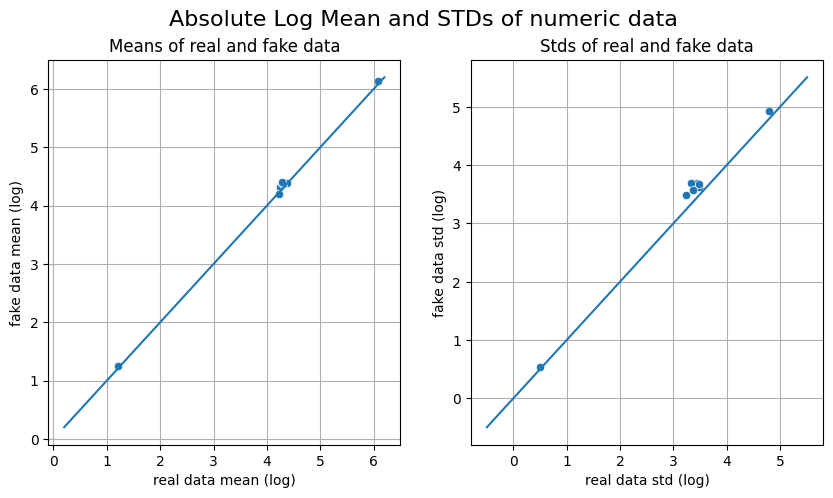

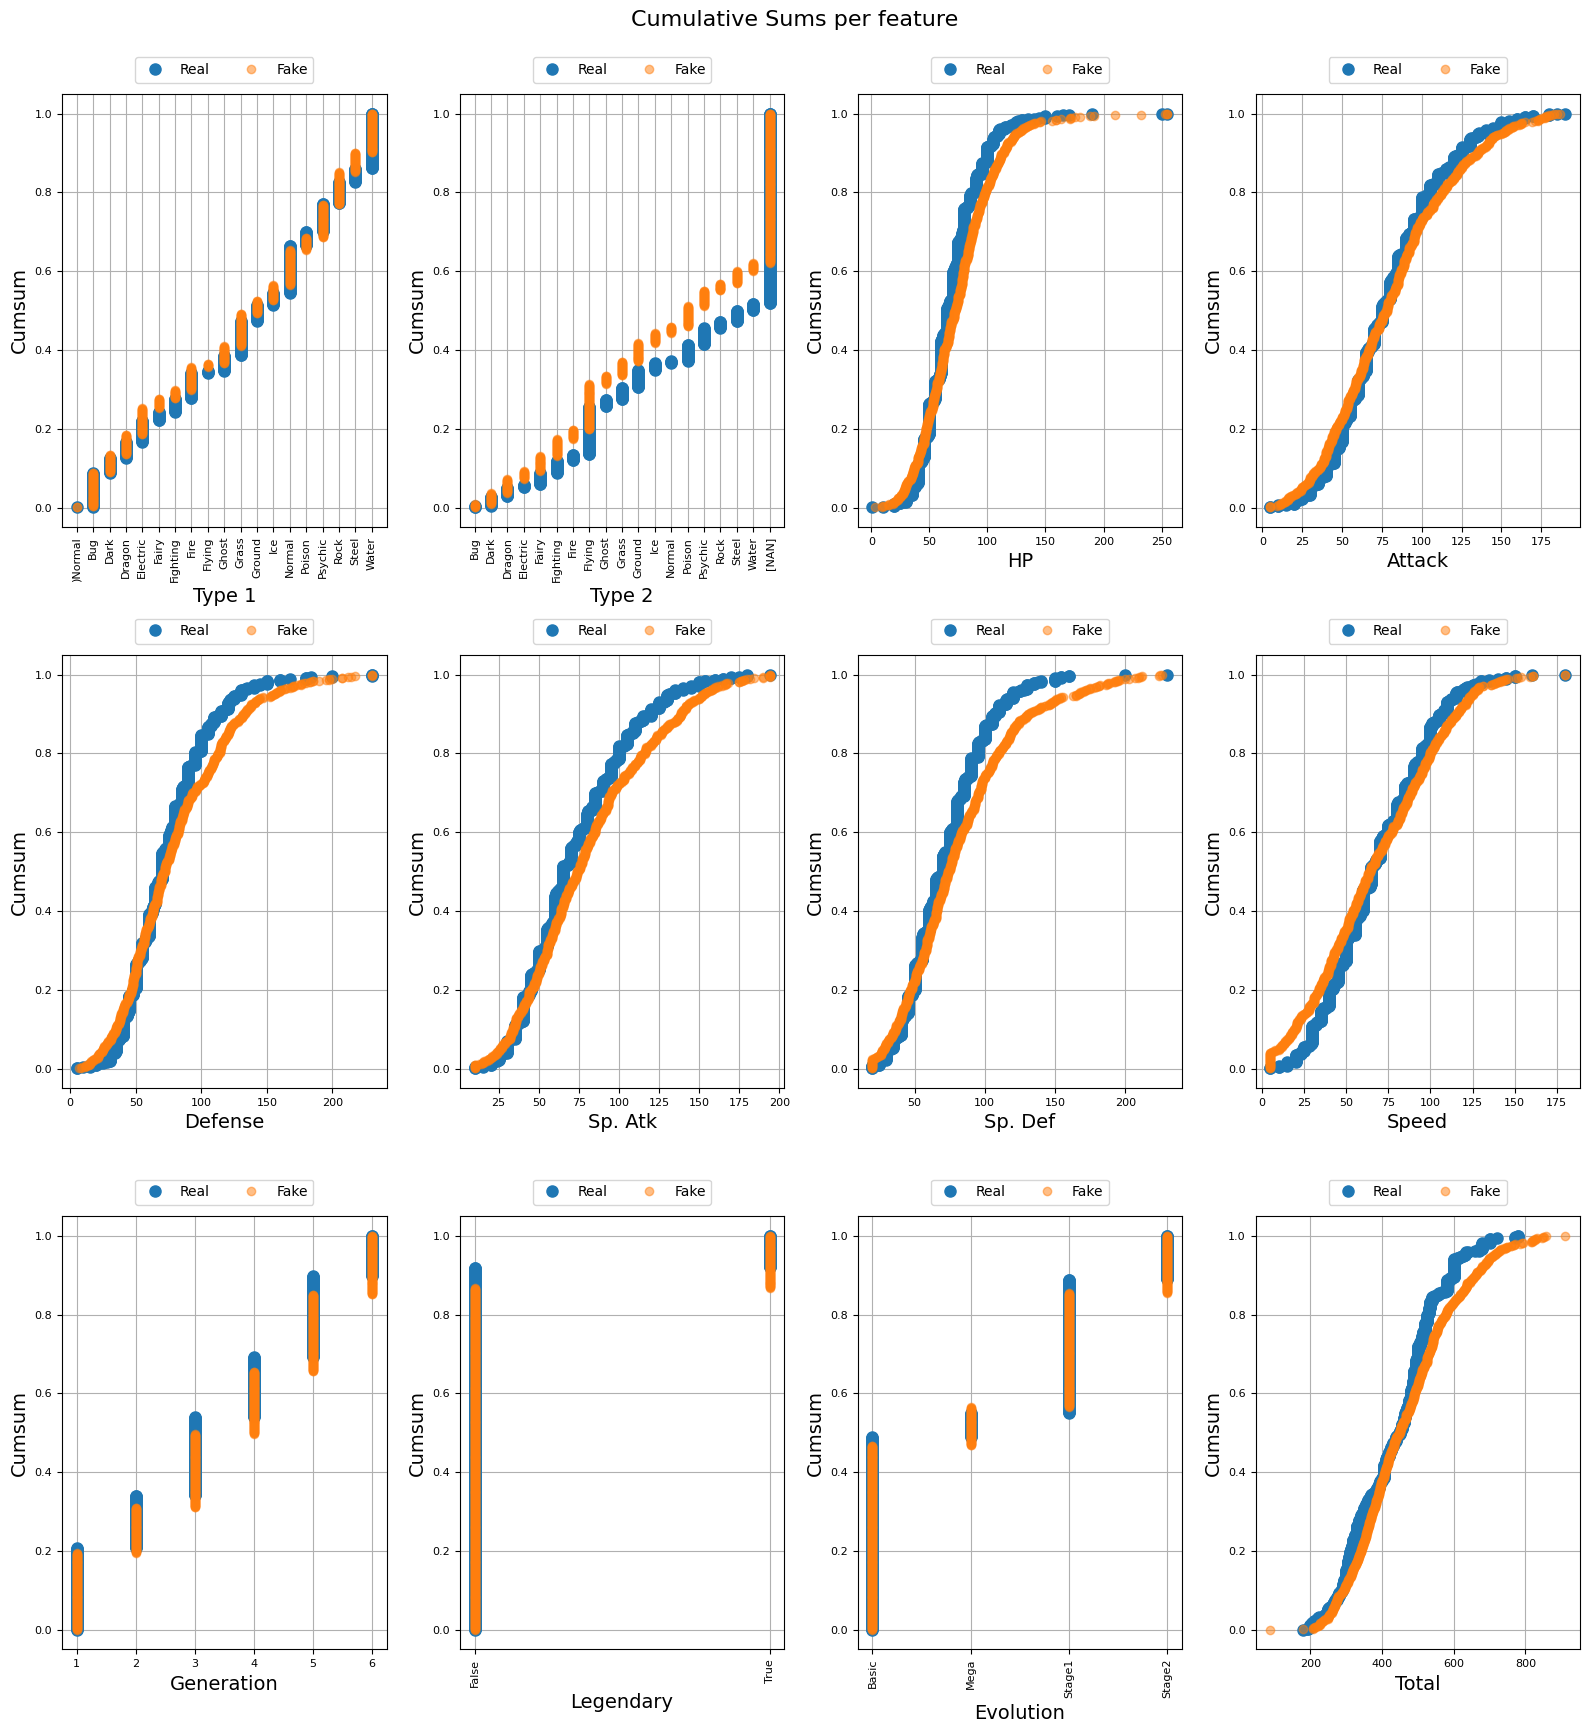

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning:

FixedFormatter should only be used together with FixedLocator



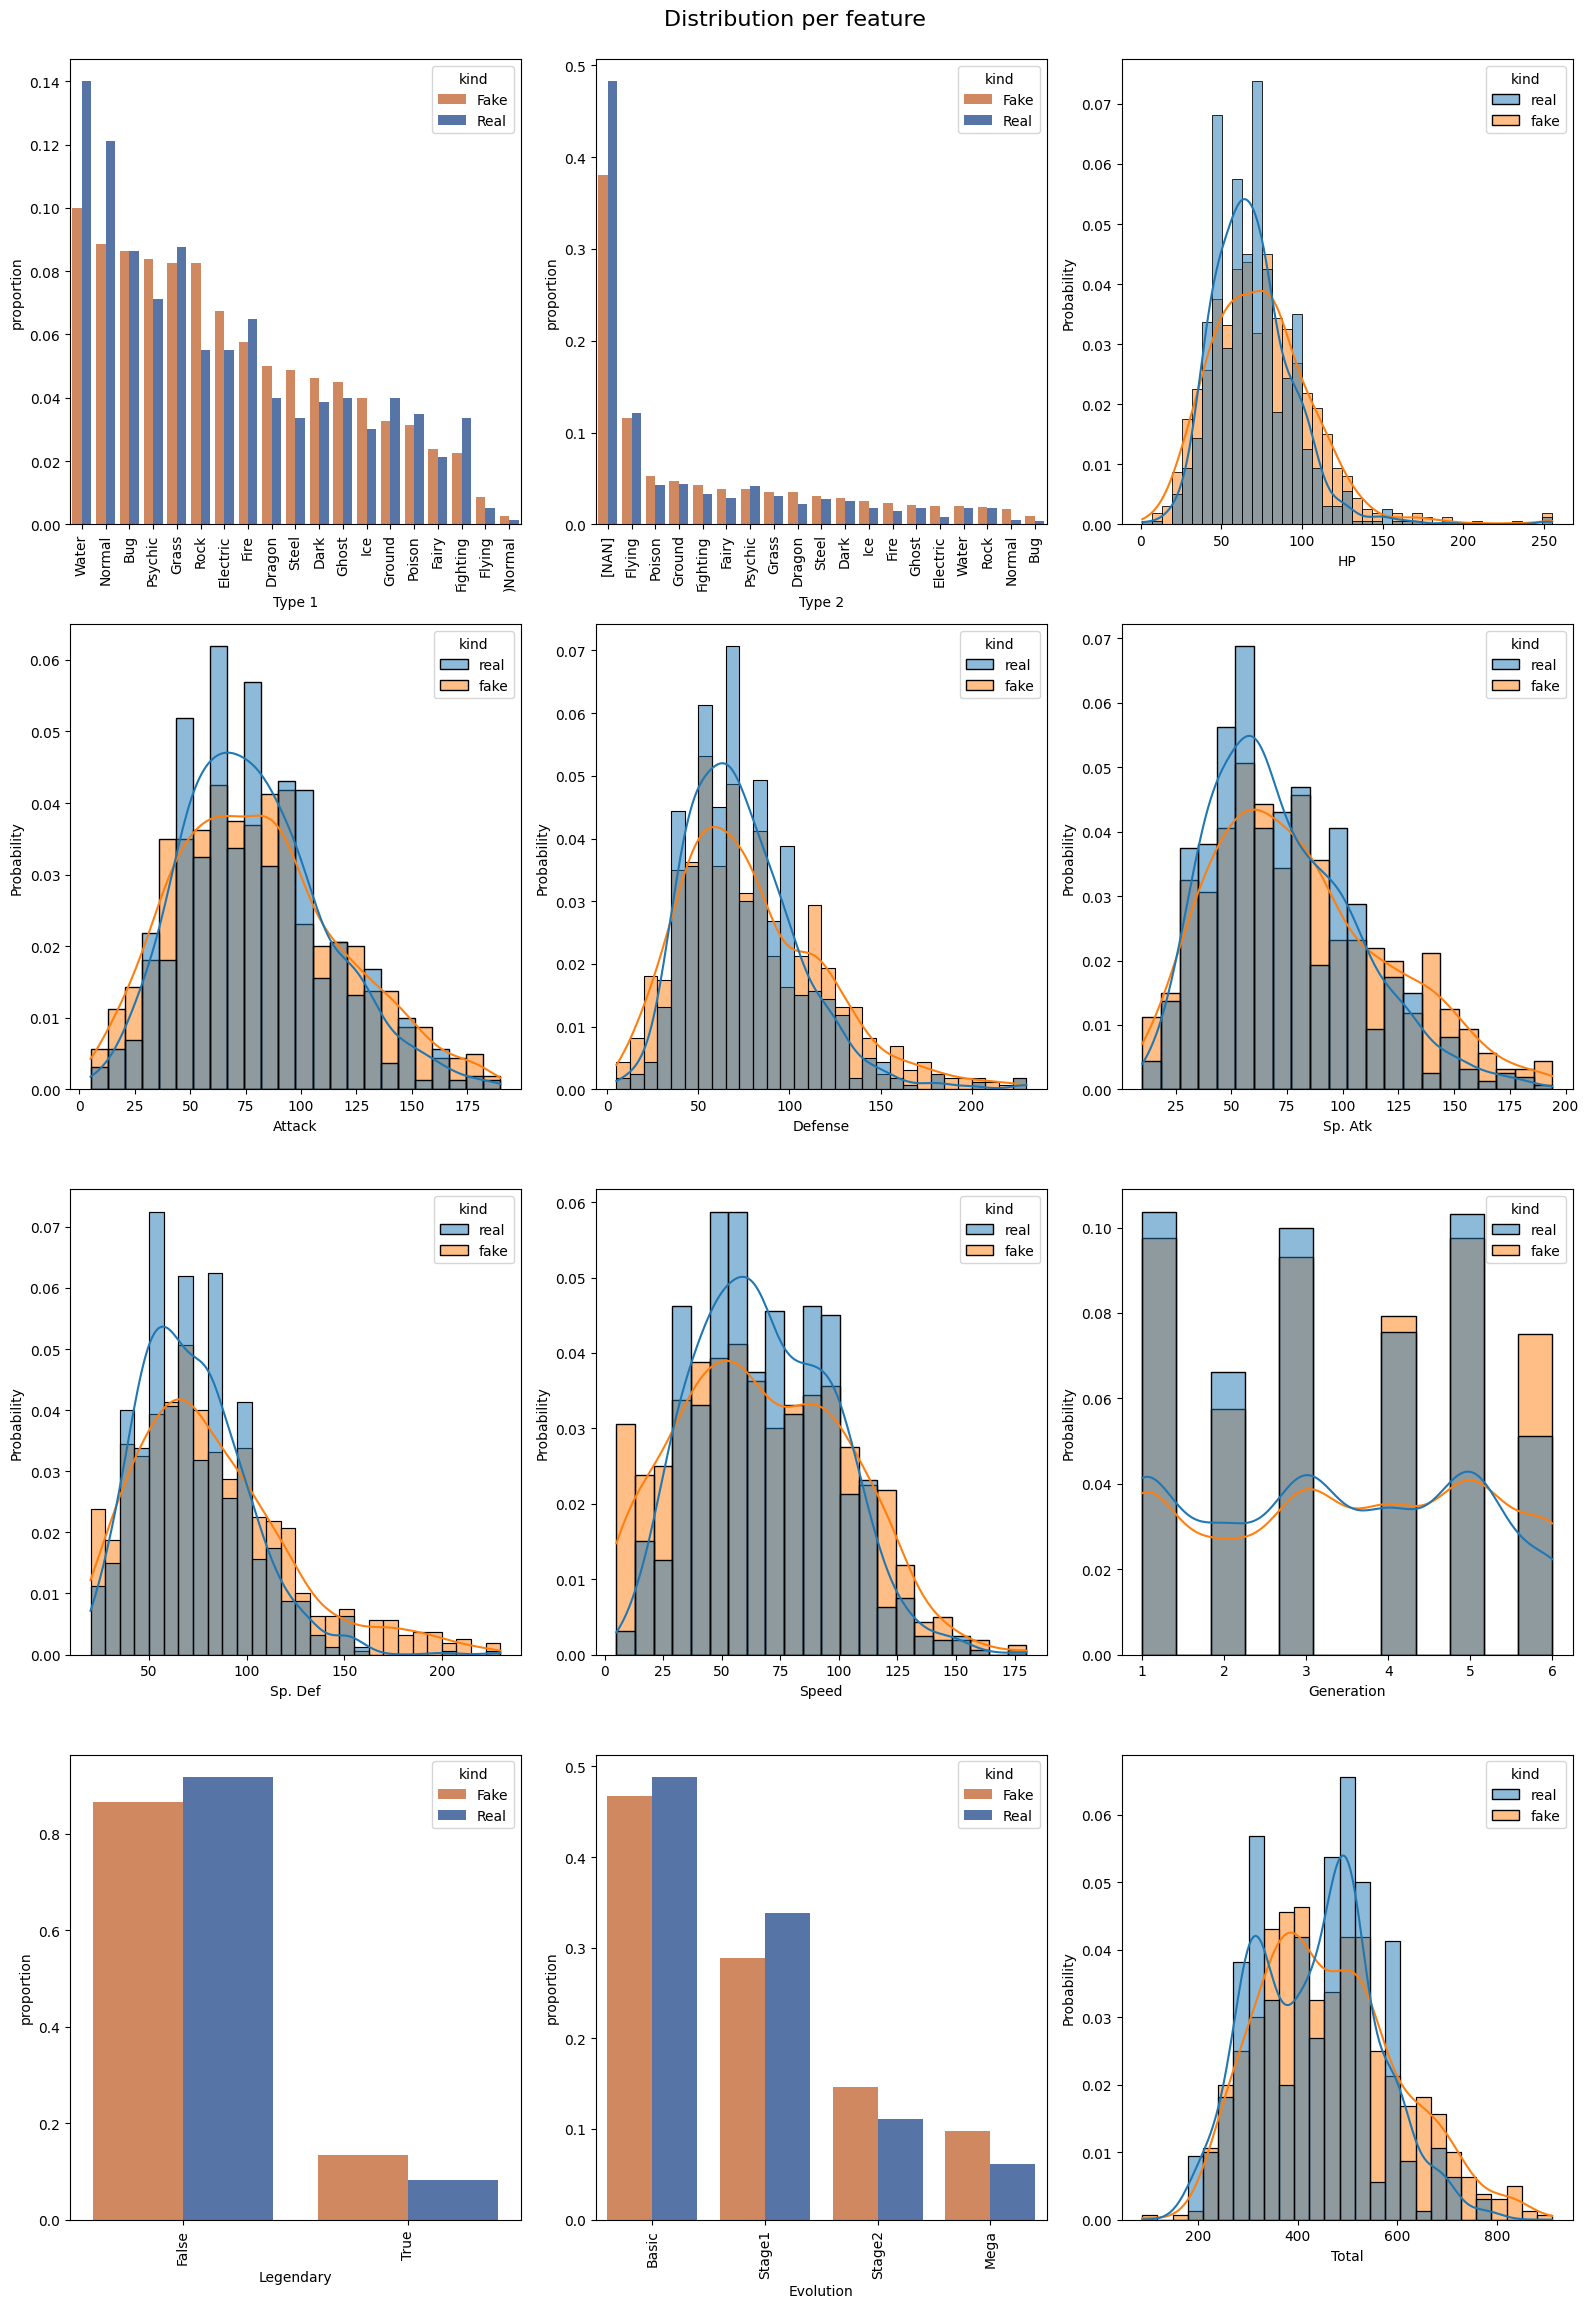

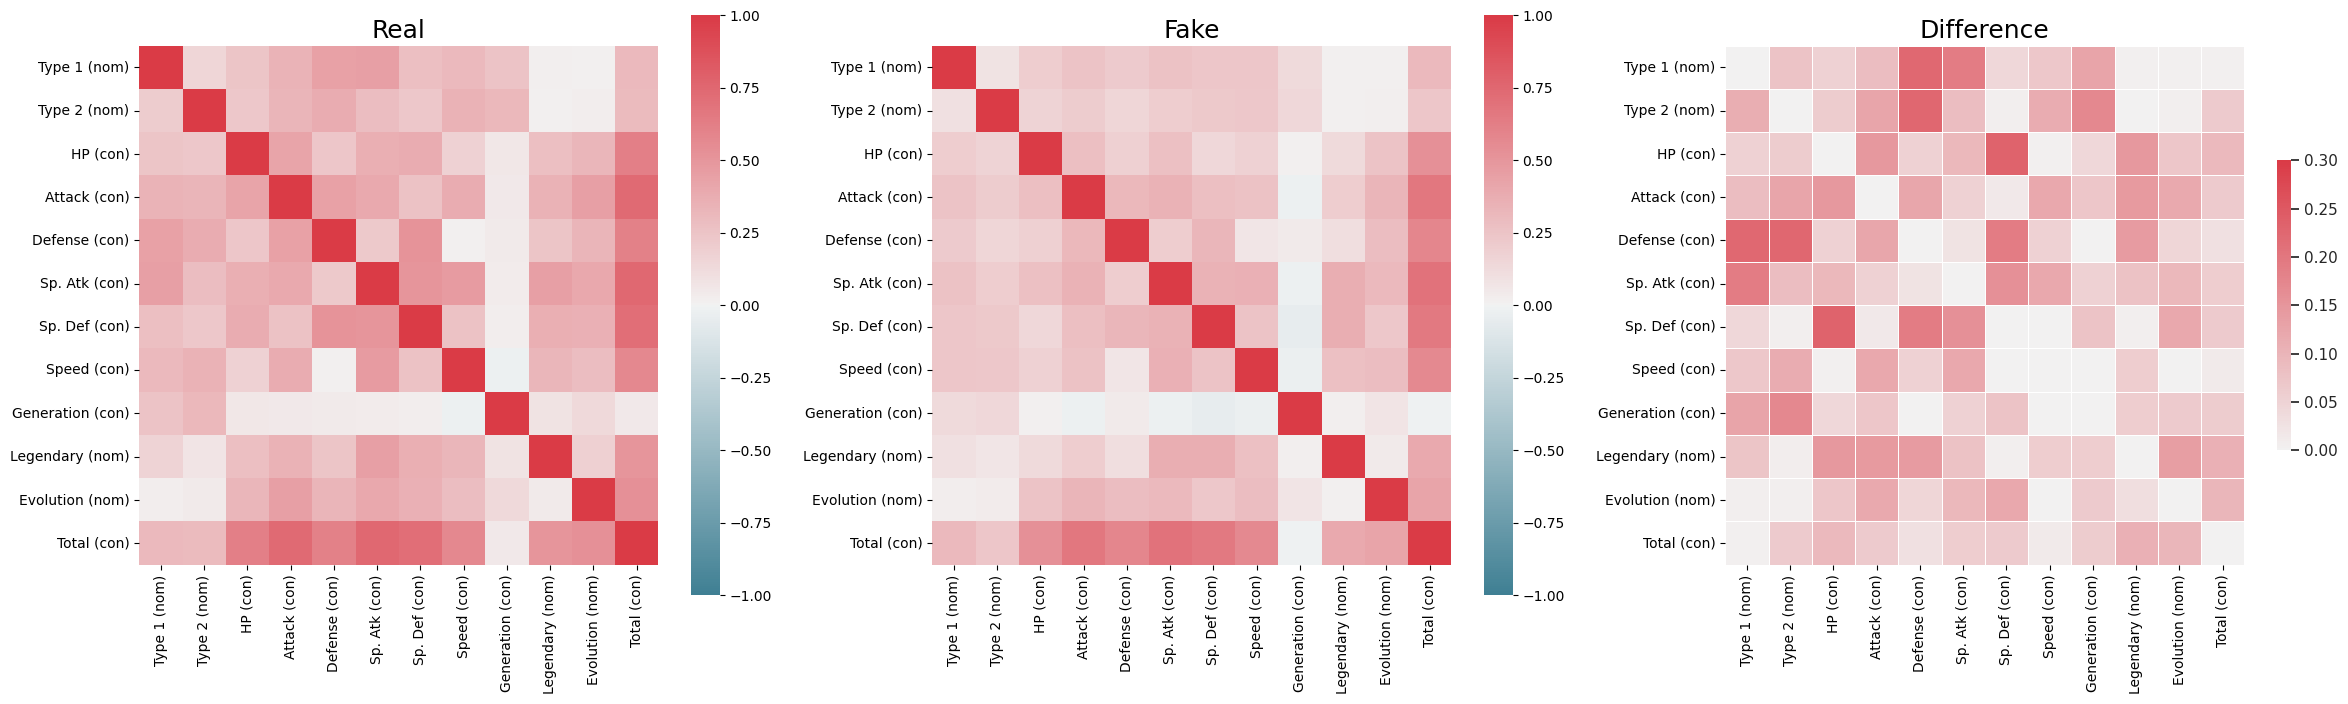

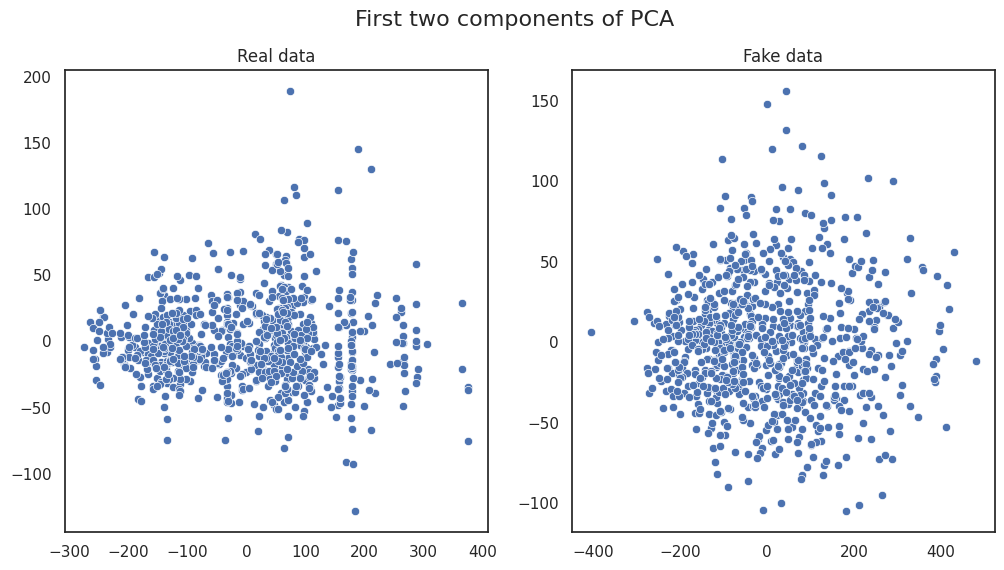

In [44]:
#ist nicht so gut , aber für eine schnelle an sicht gut da nur eine Zeile zu schreiben ist und viele grafiken gen werden
table_evaluator =  TableEvaluator(df, synthetic_data )# cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [45]:
synthetic_data.to_csv("syn.csv")